In [29]:
import networkx as nx
import random
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

In [30]:
G = nx.read_pajek("lucene.net")
G = nx.convert_node_labels_to_integers(nx.DiGraph(G), label_attribute = 'label')
G.name = "lucene.net"

In [31]:
def compute_network_statistics(G):
    n = G.number_of_nodes()
    # Get the number of edges in the graph.
    m = G.number_of_edges()
    avg_k = 2 * m / n
    density = 2 * m / n / (n - 1)
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    c_nx = nx.average_clustering(G)

    return {
        'Number of Nodes': n,
        'Number of Edges': m,
        'Average Degree': avg_k,
        'Density': density,
        'Max Degree' : dmax,
        'Average Clustering': c_nx
    }


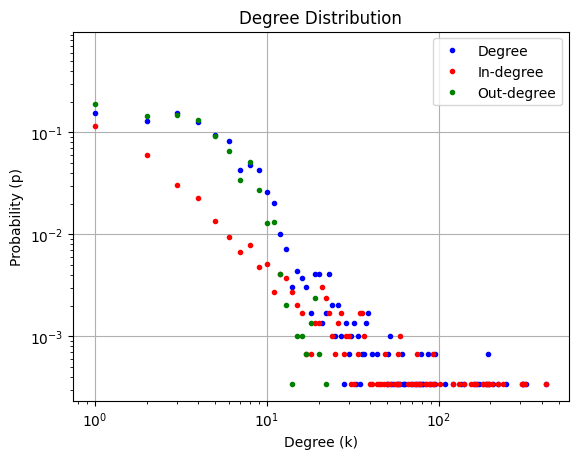

In [32]:
#print(compute_network_statistics(G))
degree_sequence = [x[1] for x in G.degree()]
in_degree_sequence = [x[1] for x in G.in_degree()]
out_degree_sequence = [x[1] for x in G.out_degree()]

k_count = np.bincount(k)
in_degree_counts = np.bincount(in_degree_sequence)
out_degree_counts = np.bincount(out_degree_sequence)

num_nodes = len(in_degree_sequence)
pk = k_count/len(k)
pk_in = in_degree_counts/num_nodes
pk_out = out_degree_counts/num_nodes

nonzero_indices = np.nonzero(pk)
k_values = np.arange(len(pk))[nonzero_indices]
pk_nonzero = pk[nonzero_indices]

nonzero_indices_in = np.nonzero(pk_in)
k_values_in = np.arange(len(pk_in))[nonzero_indices_in]
pk_in_nonzero = pk_in[nonzero_indices_in]

nonzero_indices_out = np.nonzero(pk_out)
k_values_out = np.arange(len(pk_out))[nonzero_indices_out]
pk_out_nonzero = pk_out[nonzero_indices_out]

plt.title('Degree Distribution')
plt.loglog(k_values, pk_nonzero, marker='o', markersize=3,linestyle='None', color='b', label = 'Degree')
plt.loglog(k_values_in, pk_in_nonzero, marker='o', markersize=3,linestyle='None', color='r', label='In-degree')
plt.loglog(k_values_out, pk_out_nonzero, marker='o', markersize=3,linestyle='None', color='g', label='Out-degree')
plt.xlabel('Degree (k)')
plt.ylabel('Probability (p)')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
def power_law(degree_sequence, k_min):
    n = len(degree_sequence)
    degree_sequence = np.array(degree_sequence)
    degree_sequence = degree_sequence[degree_sequence >= k_min]
    n_eff = len(degree_sequence)
    sum_ln_k = np.sum(np.log(degree_sequence / (k_min-1)))
    gamma = 1 + n_eff * (1 / sum_ln_k)
    return gamma
    
gamma = power_law(degree_sequence, 5)
print("Gamma:", gamma_degree)

Gamma: 1.2571616802664345
